# Лабораторная работа №2
## Визуальный анализ данных

### Подключение библиотек

In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Загрузка данных

In [66]:
data_path = "/content/data2.csv"
data = pd.read_csv(data_path)
data.head(10)
# data.columns

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,101,419,No,Yes,18,266.1,122,45.07,197.4,199,16.78,244.7,91,11.01,10.0,3,2.70,1,True
1,OH,107,415,Yes,Yes,14,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,True
2,NJ,137,415,No,No,29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,True
3,OH,84,408,Yes,No,22,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,True
4,OK,75,415,Yes,No,24,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,True
5,AL,118,510,Yes,No,23,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,True
6,MA,121,510,No,Yes,17,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,True
7,MO,147,415,No,Yes,10,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,True
8,LA,117,408,Yes,Yes,19,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,True
9,WV,141,415,Yes,Yes,13,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,True


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   64 non-null     object 
 1   Account length          64 non-null     int64  
 2   Area code               64 non-null     int64  
 3   International plan      64 non-null     object 
 4   Voice mail plan         64 non-null     object 
 5   Number vmail messages   64 non-null     int64  
 6   Total day minutes       64 non-null     float64
 7   Total day calls         64 non-null     int64  
 8   Total day charge        64 non-null     float64
 9   Total eve minutes       64 non-null     float64
 10  Total eve calls         64 non-null     int64  
 11  Total eve charge        64 non-null     float64
 12  Total night minutes     64 non-null     float64
 13  Total night calls       64 non-null     int64  
 14  Total night charge      64 non-null     floa

### Одиночные признаки
#### Количественные признаки

In [68]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

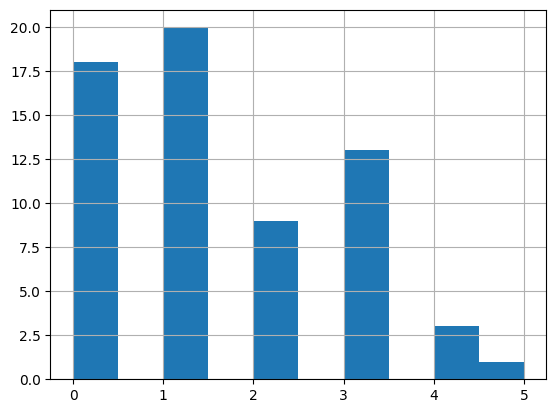

In [69]:
# Применение pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data['Customer service calls'].hist();

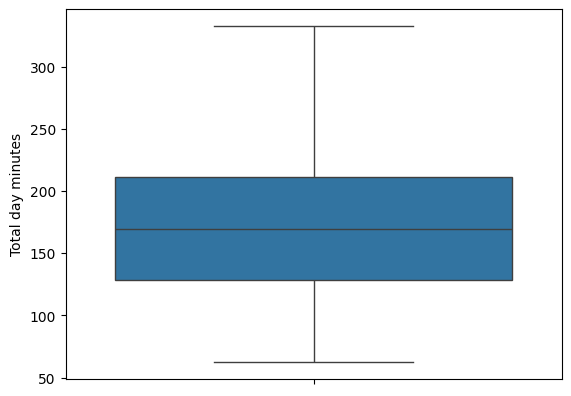

In [70]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(data['Total day minutes']);

<ipython-input-71-add119f26021>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='State',


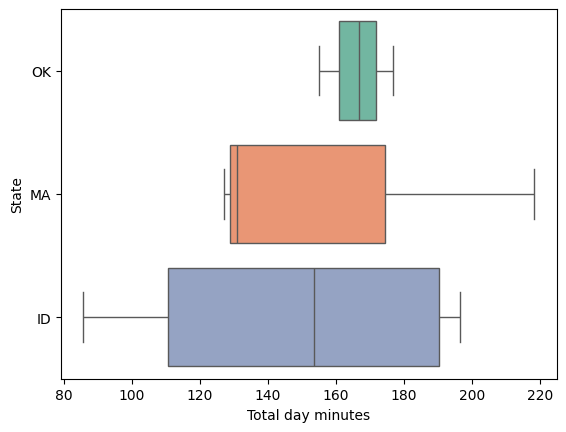

In [71]:
top_data = data[['State','Total day minutes']]
top_data = top_data.groupby('State').sum()
top_data = top_data.sort_values('Total day minutes',ascending=False)
top_data = top_data[:3].index.values
sns.boxplot(y='State',
            x='Total day minutes',
            data=data[data.State.isin(top_data)], palette='Set2');

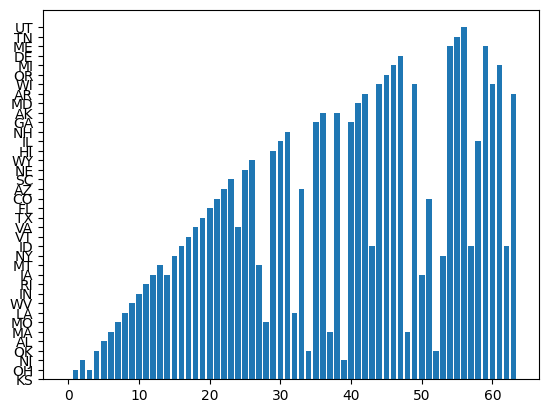

In [72]:
plt.bar(data.index, data['State'])
plt.show()

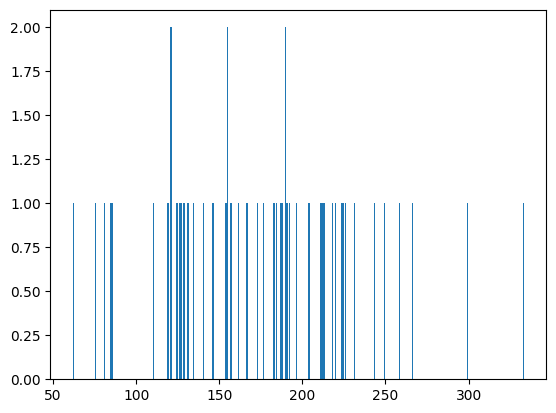

In [73]:
hist = data['Total day minutes'].value_counts()
plt.bar(hist.index, hist);

In [74]:
# jn,jh ghbpyfrjd
feats=[f for f in data.columns if 'charge' in f]
feats

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

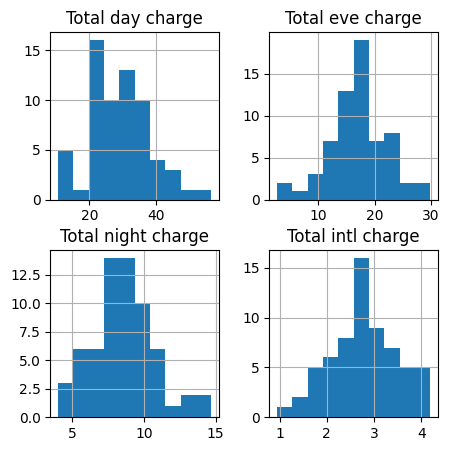

In [75]:
# построение гистограммы для нескольких признаков
data[feats].hist(figsize=(5,5));

### Категориальные признаки

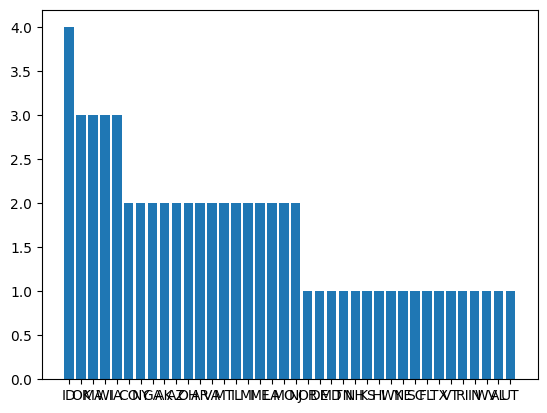

In [76]:
# определение первых n "популярных" штатов
# data['State'].value_counts().head(10)
hist = data['State'].value_counts()
plt.bar(hist.index, hist);


In [77]:
# фактически бинарный признак
data['Churn'].value_counts()

Churn
True     60
False     4
Name: count, dtype: int64

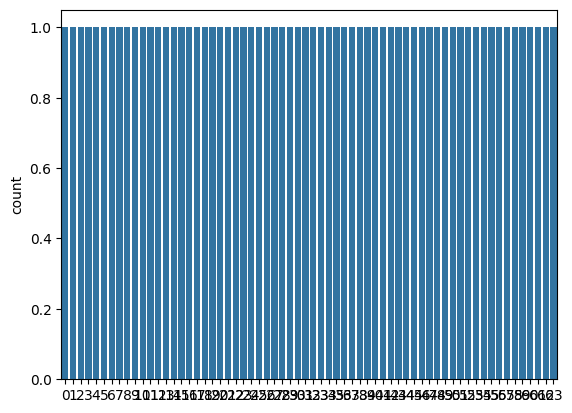

In [78]:
sns.countplot(data['Churn']);

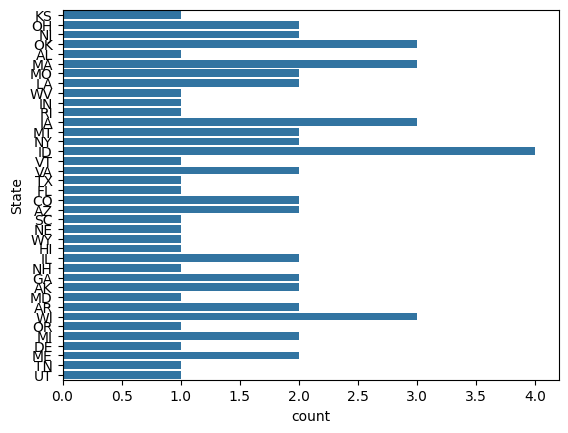

In [79]:
# гистограмма для всех штатов
sns.countplot(data['State']);

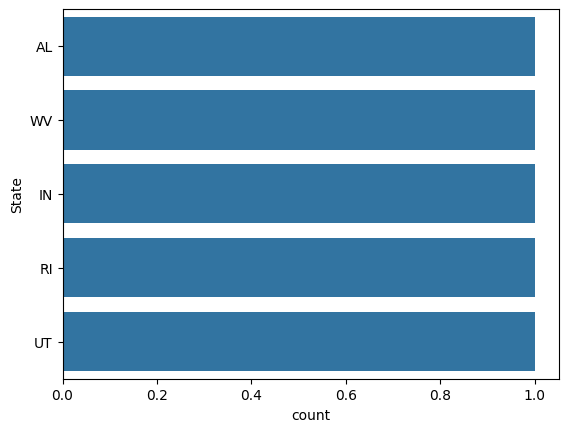

In [80]:
# гистограмма "популярных" штатов
sns.countplot(data[data['State'].isin(data['State'].value_counts().tail(5).index)]['State']);

### Взаимосвязанные признаки
#### Количественный - количественный

In [81]:
# список колонок
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [82]:
# Отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'charge' in f]
len(feats)
# feats=['Total day calls', 'Total day charge']

4

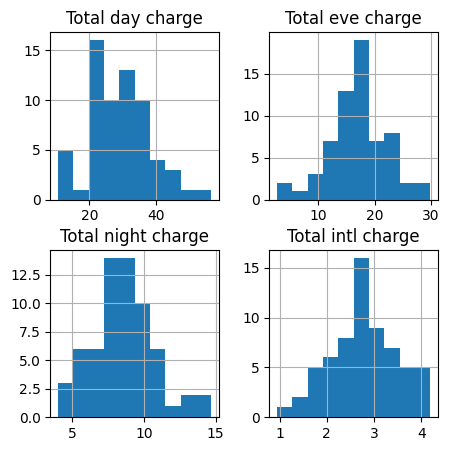

In [83]:
# строим отдельные гистограммы
# для нескольких признаков
data[feats].hist(figsize=(5,5));

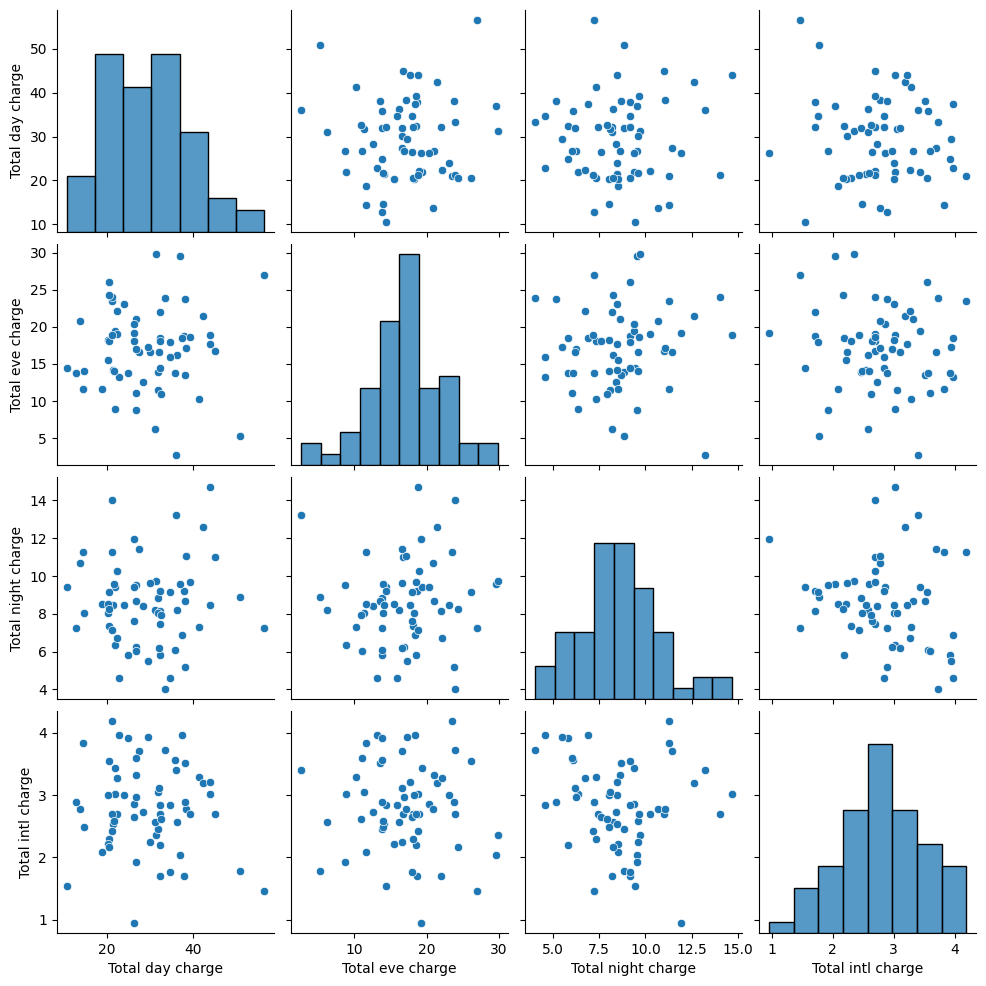

In [84]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats]);

Можно строить более сложные попарные распределения признаков

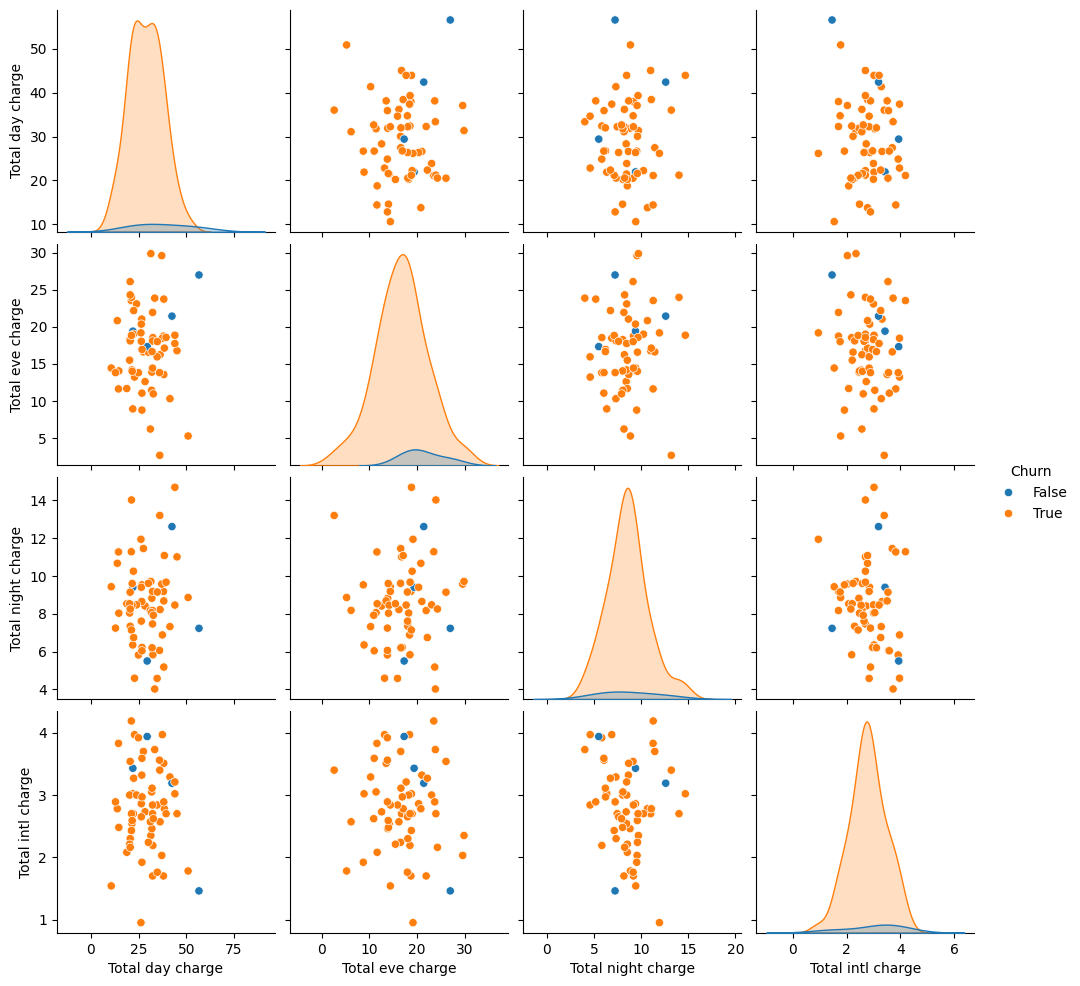

In [85]:
sns.pairplot(data[feats + ['Churn']], hue='Churn');

Использование matplotlib, подписей данных, заголовков
Использование простейших пользовательских цветов

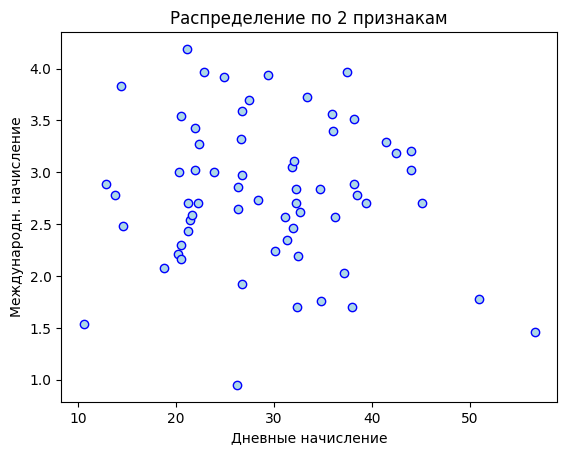

In [86]:
plt.scatter(data['Total day charge'],
            data['Total intl charge'],
            color='lightblue', edgecolors='blue')
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение по 2 признакам');

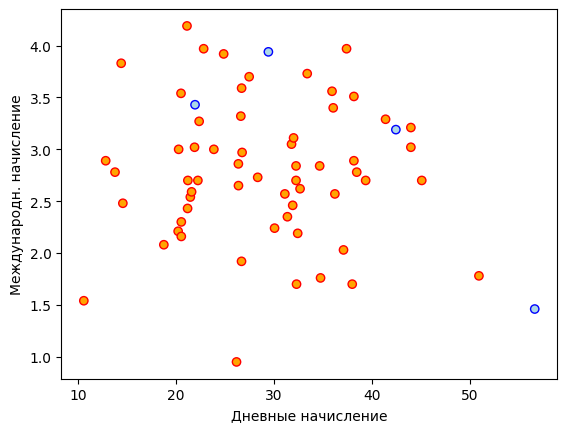

In [87]:
# Раскрашивание данных
# Цвет в зависимости от ухода клиента
c = data['Churn'].map({False: 'lightblue', True: 'orange'})
edge_c = data['Churn'].map({False: 'blue', True: 'red'})
# Настройка графика
plt.scatter(data['Total day charge'], data['Total intl charge'],
            color=c, edgecolors=edge_c
           )
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление');

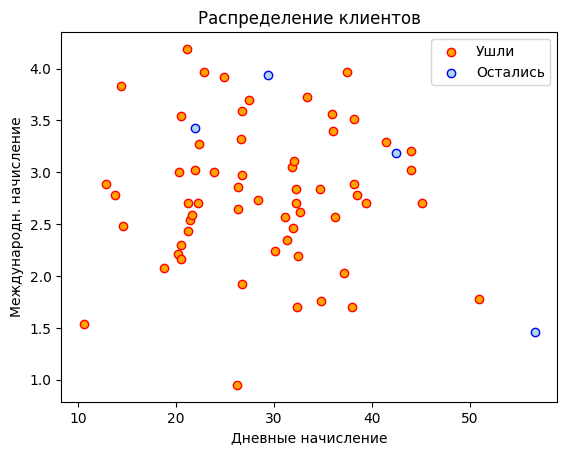

In [88]:
# Раскраска лояльных и ушедших клиентов,
# добавление легенды

# Ушедшие клиенты
data_churn = data[data['Churn']]
# Оставшиеся клиенты
data_loyal = data[~data['Churn']]

plt.scatter(data_churn['Total day charge'],
            data_churn['Total intl charge'],
            color='orange',
            edgecolors='red',
            label='Ушли'
           )
plt.scatter(data_loyal['Total day charge'],
            data_loyal['Total intl charge'],
            color='lightblue',
            edgecolors='blue',
            label='Остались'
           )
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение клиентов')
plt.legend();

### Корреляция признаков

Из карты heatmap видно, что некоторые признаки коррелируют:
например сильная корреляция в парах (total day charge, total day minutes),
(total night charge, total night minutes).
Из таких пар можно удалить один признак

In [91]:
# Удаление коррелирующих признаков
data_uncorr = data.drop(feats, axis=1)
data_uncorr.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

Перестраиваем heatmap без коррелирующих признаков